# 1. [shivamardeshna](https://www.kaggle.com/datasets/shivamardeshna/real-and-fake-images-dataset-for-image-forensics)

In [ ]:
import os
from PIL import Image
import shutil
import kagglehub

# Download latest version
directory = kagglehub.dataset_download("shivamardeshna/real-and-fake-images-dataset-for-image-forensics")

print("Path to dataset files:", directory)

real = 0
fake = 0
dimension_dict = {}
file_size = {}
extensions = set()

for i in ['real', 'fake']:
    for j in ['train', 'test', 'validation']:
        if not os.path.exists(os.path.join(directory, f'{i}_{j}')):
            os.mkdir(os.path.join(directory, f'{i}_{j}'))

for root, dirs, files in os.walk(directory):
    up_two = root.split(os.sep)[-1] + '_' + root.split(os.sep)[-2]
    if len(root.split(os.sep)) == 13:
        if root.split(os.sep)[-1] == 'real':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('real_'):
                    old_path = os.path.join(root, filename)

                    file_size_num = os.path.getsize(old_path)
                    if file_size_num not in file_size:
                        file_size[file_size_num] = 1
                    else:
                        file_size[file_size_num] += 1

                    new_name = 'real_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    real += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    real += 1

        if root.split(os.sep)[-1] == 'fake':
            parent_dir_name = root.split(os.sep)[-2]
            for filename in files:
                extensions.add(filename.split('.')[-1])
                with Image.open(os.path.join(root, filename)) as img:
                    width, height = img.size
                    if f'{width}x{height}' not in dimension_dict:
                        dimension_dict[f'{width}x{height}'] = 1
                    else:
                        dimension_dict[f'{width}x{height}'] += 1
                if not filename.startswith('fake_'):
                    old_path = os.path.join(root, filename)

                    file_size_num = os.path.getsize(old_path)
                    if file_size_num not in file_size:
                        file_size[file_size_num] = 1
                    else:
                        file_size[file_size_num] += 1

                    new_name = 'fake_' + filename
                    new_path = os.path.join(directory, up_two, new_name)
                    shutil.move(old_path, new_path)
                    fake += 1
                else:
                    old_path = os.path.join(root, filename)
                    new_path = os.path.join(directory, up_two, filename)
                    shutil.move(old_path, new_path)
                    fake += 1

print(f'# real: {real} || # fake: {fake} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 2.76G/2.76G [00:34<00:00, 85.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamardeshna/real-and-fake-images-dataset-for-image-forensics/versions/1
# real: 115201 || # fake: 115134 || {'256x256': 230335} || {'jpg'} || {32135: 3, 31526: 4, 28941: 5, 26676: 2, 35582: 2, 27213: 6, 22661: 1, 36386: 2, 31308: 3, 31741: 2, 25131: 6, 34568: 3, 25435: 2, 24561: 3, 30091: 2, 29559: 7, 32563: 2, 27183: 6, 40306: 1, 18240: 1, 33209: 3, 28550: 6, 29954: 5, 30857: 7, 26569: 10, 28123: 3, 26944: 3, 28065: 4, 30297: 3, 26866: 4, 33234: 2, 28683: 8, 31368: 6, 38286: 1, 29925: 4, 30515: 5, 31366: 3, 26420: 3, 27952: 6, 26137: 6, 30171: 2, 28047: 6, 30374: 9, 27684: 6, 23257: 4, 28008: 3, 24991: 4, 28228: 3, 28179: 5, 32024: 6, 29526: 8, 26389: 6, 29022: 5, 30401: 2, 30453: 6, 34001: 2, 20775: 2, 29461: 4, 41440: 2, 27061: 2, 29045: 6, 23332: 4, 26963: 4, 25413: 5, 31934: 3, 24231: 6, 31017: 6, 27230: 5, 35545: 2, 21440: 2, 27569: 4, 29460: 8, 30482: 8, 35876: 2, 25292: 2, 29645: 6, 30285: 4, 25512: 4, 30798: 6, 28261: 4

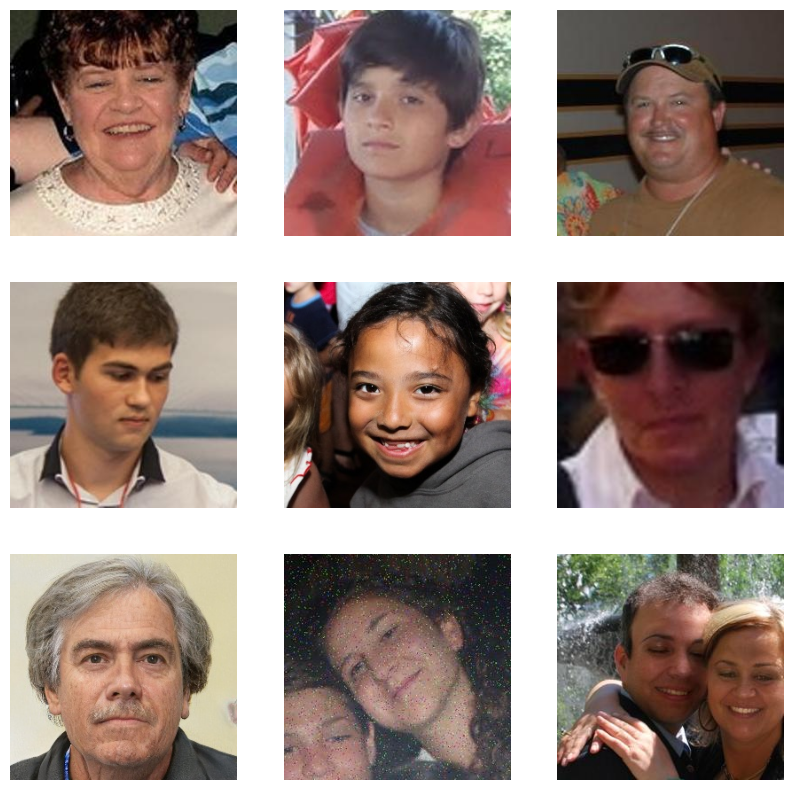

In [ ]:
import random
import matplotlib.pyplot as plt

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


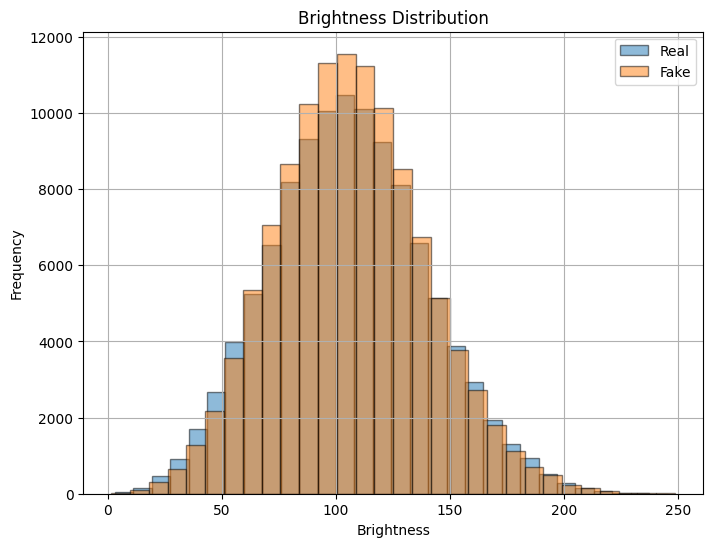

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            brightness = get_brightness(file_path)
            if file.startswith('real_'):
                brightness_values['real'].append(brightness)
            else:
                brightness_values['fake'].append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


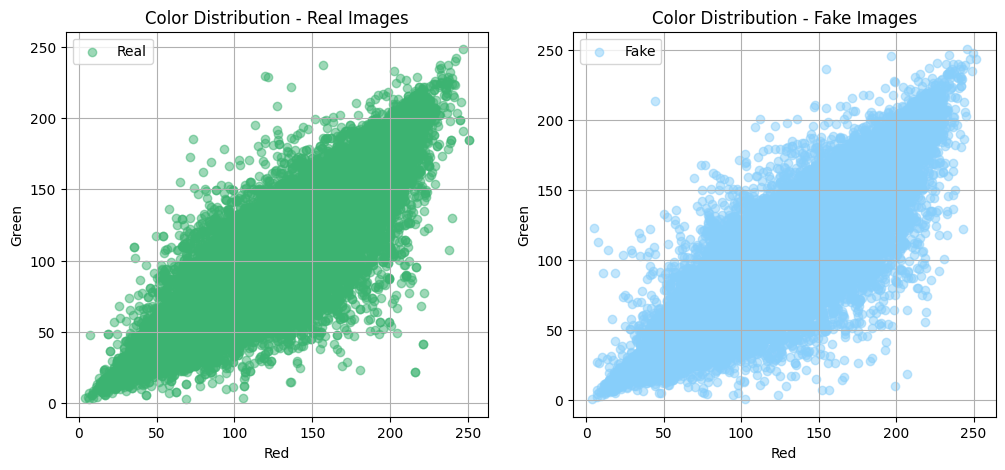

In [ ]:
def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            avg_color = get_avg_color(file_path)
            if file.startswith('real_'):
                real_colors.append(avg_color)
            else:
                fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real Images")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake Images")

plt.show()


# 2. [Yonsei](https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection)

In [ ]:
import kagglehub

import os
from PIL import Image
import shutil

# Download latest version
directory = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

print("Path to dataset files:", directory)

real = 0
fake = 0
difficulty = {'easy': 0, 'mid': 0, 'hard': 0}
dimension_dict = {}
file_size = {}
extensions = set()

for root, dirs, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        if filename.startswith('real_'):
            real += 1
        else:
            fake += 1
            if filename.startswith('easy_'):
                difficulty['easy'] += 1
            elif filename.startswith('mid_'):
                difficulty['mid'] += 1
            elif filename.startswith('hard_'):
                difficulty['hard'] += 1

print(f'# real: {real} || # fake: {fake} -> {difficulty} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
# file_size_num.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1
# real: 1081 || # fake: 960 -> {'easy': 240, 'mid': 480, 'hard': 240} || {'600x600': 2041} || {'jpg'} || {155286: 1, 100740: 1, 109420: 1, 89404: 1, 173786: 1, 131429: 1, 209211: 1, 82727: 1, 73290: 1, 92832: 1, 45322: 1, 189661: 1, 92783: 1, 87314: 1, 150925: 1, 138634: 1, 72877: 1, 114928: 1, 81733: 1, 124316: 1, 103579: 1, 106962: 1, 98972: 1, 126127: 1, 99020: 1, 158232: 1, 102366: 1, 79825: 1, 43858: 1, 95626: 1, 100055: 1, 84408: 1, 138206: 1, 166591: 1, 190982: 1, 92772: 1, 126704: 1, 73532: 1, 108615: 1, 111434: 1, 86730: 1, 95553: 1, 103101: 1, 49753: 1, 118540: 1, 109371: 1, 97879: 1, 35998: 1, 90355: 1, 125922: 1, 97444: 1, 109520: 1, 100285: 1, 139578: 1, 124338: 2, 84348: 1, 69492: 1, 56986: 1, 74525: 1, 91741: 1, 101139: 1, 114179: 1, 256255: 1, 131004: 1, 118914: 1, 118133: 1, 129203: 1, 141996: 1, 106150: 1, 291856: 1, 119144: 1, 177333: 1, 93850: 1, 110468: 1, 165549: 

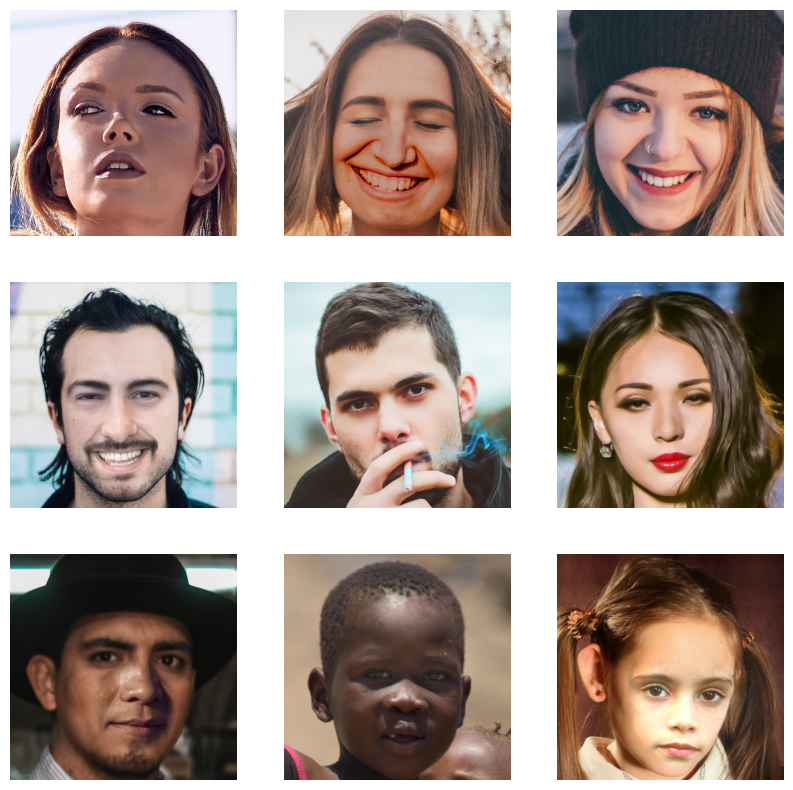

In [ ]:
import matplotlib.pyplot as plt
import random

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


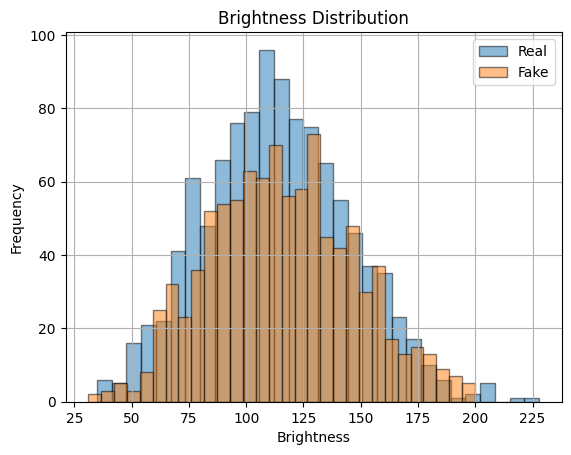

In [ ]:
from PIL import ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        if file.startswith('real_'):
            brightness_values['real'].append(get_brightness(file_path))
        else:
            brightness_values['fake'].append(get_brightness(file_path))

plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


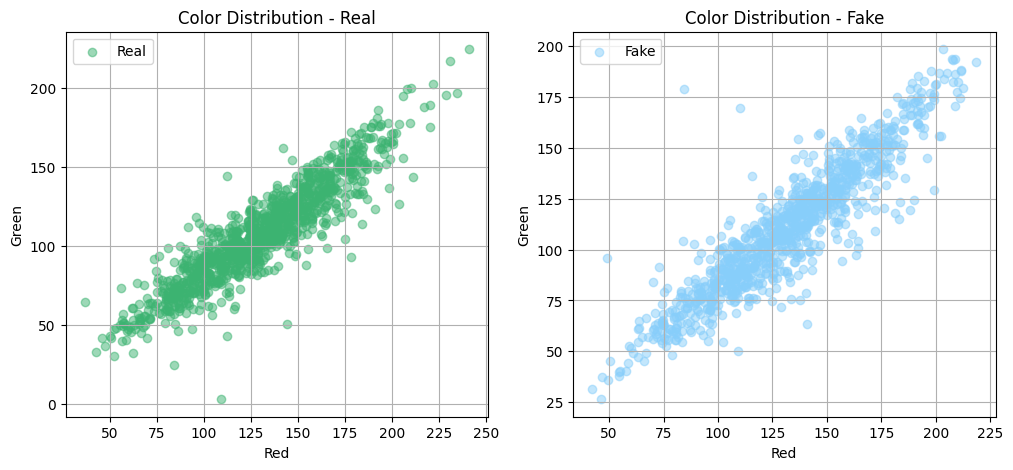

In [ ]:
import numpy as np

def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(os.path.join(directory, 'real_and_fake_face')):
    for file in files:
        file_path = os.path.join(root, file)
        avg_color = get_avg_color(file_path)
        if file.startswith('real_'):
            real_colors.append(avg_color)
        else:
            fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake")

plt.show()


# 3. [CelebA](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset)

In [2]:
import kagglehub
import os
import pandas as pd
from PIL import Image

directory = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", directory)

attr = pd.read_csv(os.path.join(directory, 'list_attr_celeba.csv'))

dimension_dict = {}
file_size = {}
extensions = set()

for root, dirs, files in os.walk(os.path.join(directory, 'img_align_celeba', 'img_align_celeba')):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1

print(f'{attr.Male.value_counts()} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 1.33G/1.33G [00:34<00:00, 41.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2
Male
-1    118165
 1     84434
Name: count, dtype: int64 || {'178x218': 202599} || {'jpg'} || {7588: 47, 7217: 61, 6316: 81, 5913: 63, 7660: 63, 6462: 80, 9571: 9, 6565: 78, 7010: 61, 7526: 53, 6022: 65, 7255: 54, 7455: 63, 10562: 4, 8494: 28, 6701: 76, 7633: 47, 6719: 73, 7818: 37, 6823: 72, 6963: 64, 5109: 23, 5490: 39, 8209: 37, 7611: 53, 7128: 57, 7737: 54, 5269: 33, 7085: 68, 6329: 83, 6204: 61, 6010: 56, 10491: 4, 7125: 61, 6341: 63, 7300: 56, 7288: 61, 9434: 9, 7695: 51, 8059: 30, 5875: 47, 6874: 64, 6453: 70, 7468: 45, 7659: 43, 8745: 16, 7132: 69, 8162: 37, 5818: 57, 6737: 77, 7813: 37, 8704: 27, 6662: 64, 7250: 75, 7397: 49, 6340: 70, 6902: 88, 6045: 55, 8459: 29, 7151: 56, 9460: 6, 5065: 25, 6482: 61, 5692: 51, 6899: 87, 6544: 67, 6444: 68, 8383: 24, 6073: 52, 10103: 4, 7123: 62, 6909: 75, 7249: 68, 5642: 40, 6658: 64, 8144: 36, 8200: 38, 7268: 72, 6301: 75, 6043: 52, 8754: 16, 647

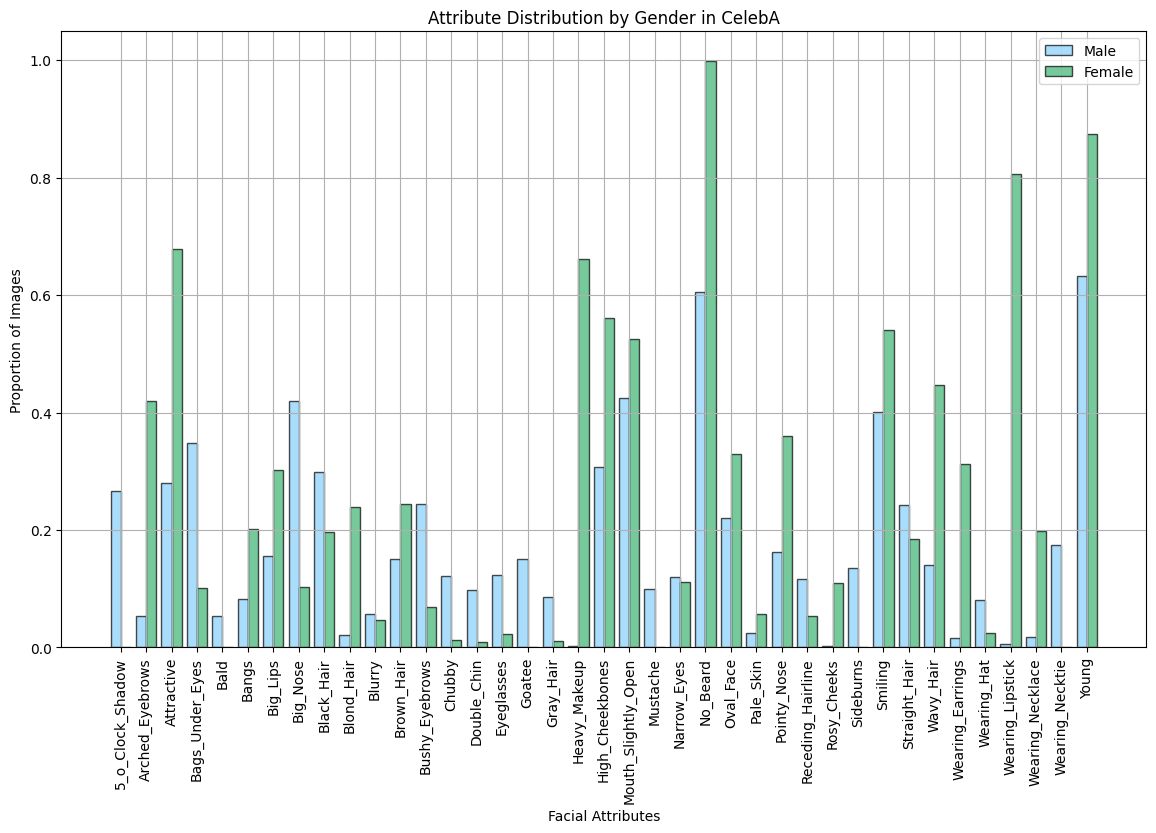

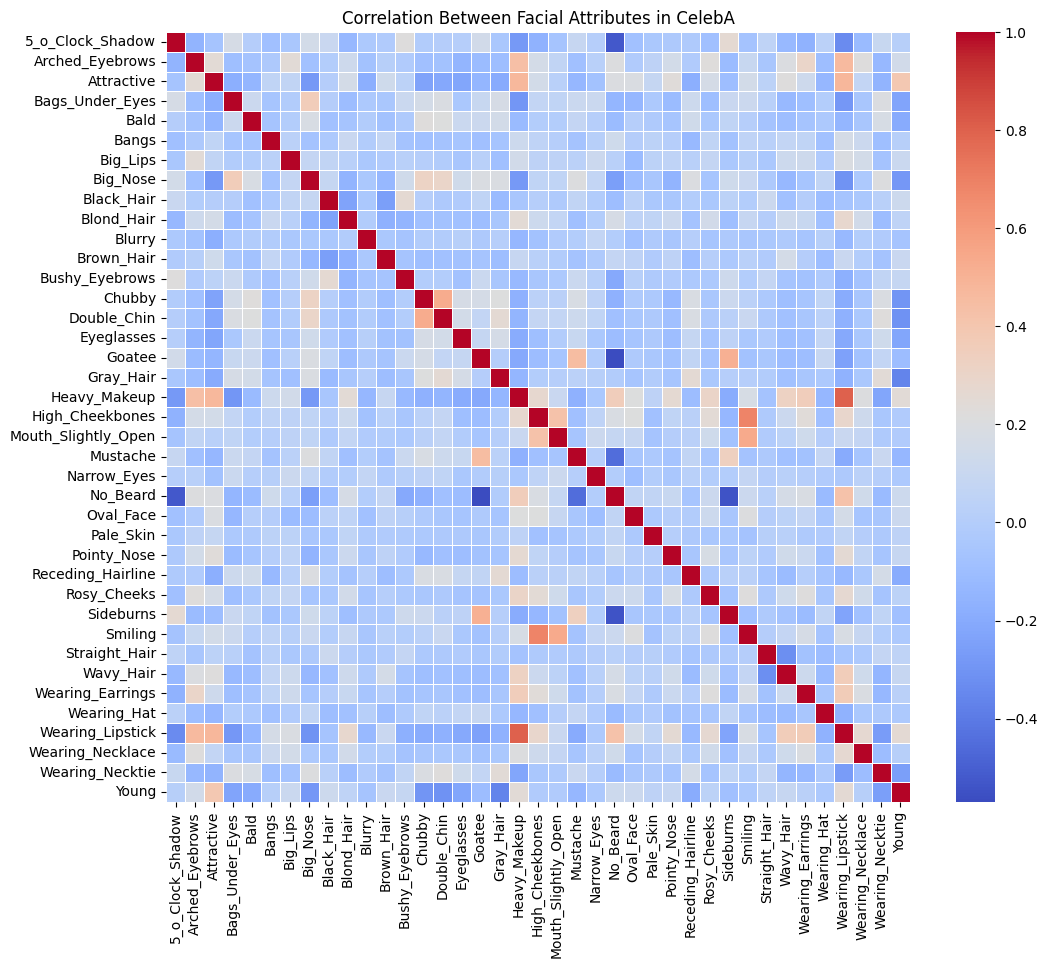

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "/root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv"

df = pd.read_csv(csv_path)
df.replace(-1, 0, inplace=True)

male_attrs = df[df["Male"] == 1].drop(columns=["image_id", "Male"]).mean()
female_attrs = df[df["Male"] == 0].drop(columns=["image_id", "Male"]).mean()

plt.figure(figsize=(14, 8))
x = range(len(male_attrs))
plt.bar(x, male_attrs, width=0.4, label="Male", alpha=0.7, color="lightskyblue", edgecolor='black')
plt.bar([i + 0.4 for i in x], female_attrs, width=0.4, label="Female", alpha=0.7, color="mediumseagreen", edgecolor='black')
plt.grid(True)

plt.xticks([i + 0.2 for i in x], male_attrs.index, rotation=90)
plt.xlabel("Facial Attributes")
plt.ylabel("Proportion of Images")
plt.title("Attribute Distribution by Gender in CelebA")
plt.legend()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=["image_id", "Male"]).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Facial Attributes in CelebA")
plt.show()


# 4. [140k Real and Fake Faces](https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces)

In [ ]:
import os
from PIL import Image
import shutil
import kagglehub

directory = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")
print("Path to dataset files:", directory)

deep_directory = os.path.join(directory, 'real_vs_fake', 'real-vs-fake')

real = 0
fake = 0
dimension_dict = {}
file_size = {}
extensions = set()

for category in ['real', 'fake']:
    for split in ['train', 'test', 'valid']:
        new_folder = os.path.join(directory, f'{category}_{split}')
        os.makedirs(new_folder, exist_ok=True)

for root, _, files in os.walk(deep_directory):
    path_parts = root.split(os.sep)

    if len(path_parts) < 2:
        continue

    dataset_type = path_parts[-2]
    category = path_parts[-1]

    if dataset_type in ['train', 'test', 'valid'] and category in ['real', 'fake']:
        for filename in files:
            file_extension = filename.split('.')[-1]
            extensions.add(file_extension)

            file_path = os.path.join(root, filename)

            file_size_num = os.path.getsize(file_path)
            if file_size_num not in file_size:
                file_size[file_size_num] = 1
            else:
                file_size[file_size_num] += 1

            with Image.open(file_path) as img:
                width, height = img.size
                dim_key = f'{width}x{height}'
                dimension_dict[dim_key] = dimension_dict.get(dim_key, 0) + 1

            new_filename = f"{category}_{filename}"
            new_folder = os.path.join(directory, f"{category}_{dataset_type}")
            new_path = os.path.join(new_folder, new_filename)
            shutil.move(file_path, new_path)

            if category == 'real':
                real += 1
            else:
                fake += 1

print(f'# real: {real} || # fake: {fake} || {dimension_dict} || {extensions} || {file_size}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 3.75G/3.75G [00:53<00:00, 75.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2
# real: 70000 || # fake: 70000 || {'256x256': 140000} || {'jpg'} || {26208: 21, 25684: 12, 26388: 11, 34153: 3, 26737: 15, 23646: 8, 31893: 8, 22801: 4, 35996: 5, 31946: 15, 25298: 11, 29535: 16, 22137: 7, 25387: 15, 30008: 15, 25520: 17, 27802: 20, 26668: 16, 22741: 5, 33208: 3, 25319: 15, 28460: 16, 28559: 16, 30967: 11, 28657: 14, 33846: 5, 40356: 2, 26312: 14, 32012: 15, 31895: 12, 26772: 15, 22155: 7, 27199: 16, 27008: 18, 27845: 19, 30189: 12, 34920: 2, 26576: 17, 30361: 13, 40443: 1, 25921: 7, 28556: 28, 29224: 18, 30404: 12, 26240: 16, 29208: 12, 26200: 15, 31444: 7, 29143: 13, 32240: 10, 25420: 17, 30029: 12, 33913: 6, 33087: 8, 23229: 7, 29081: 19, 22834: 4, 28589: 17, 26878: 15, 34233: 8, 28078: 16, 30533: 14, 28150: 11, 29628: 18, 31612: 15, 27631: 14, 24714: 14, 27775: 13, 42979: 1, 26457: 20, 27852: 25, 26667: 15, 31079: 12, 32717: 10, 30081: 11, 23466: 10, 28447: 15, 33533: 

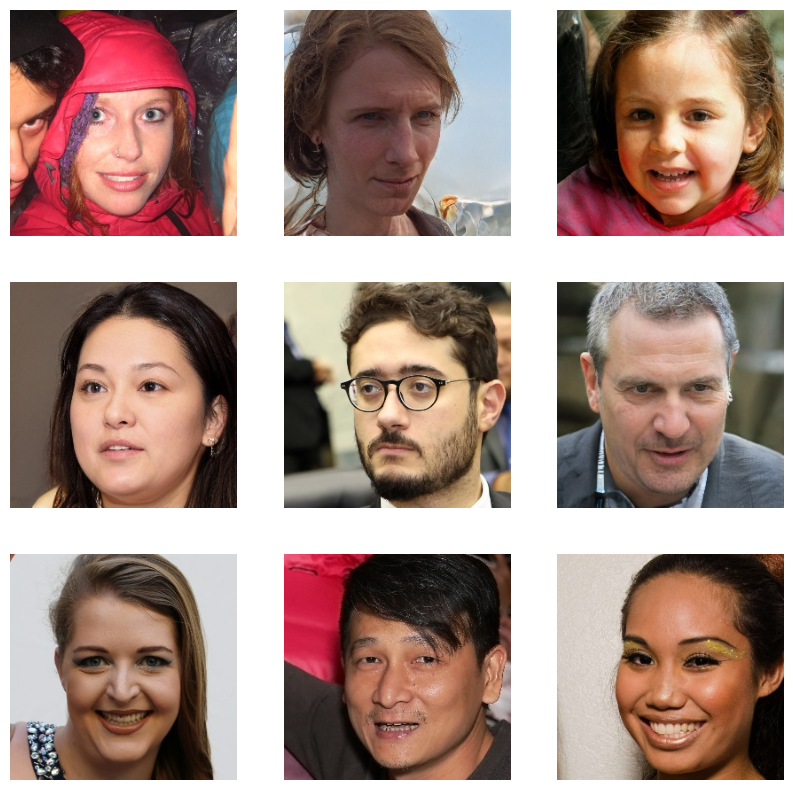

In [ ]:
import random
import matplotlib.pyplot as plt

def show_random_images(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            image_files.append(os.path.join(root, file))

    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

show_random_images(directory)


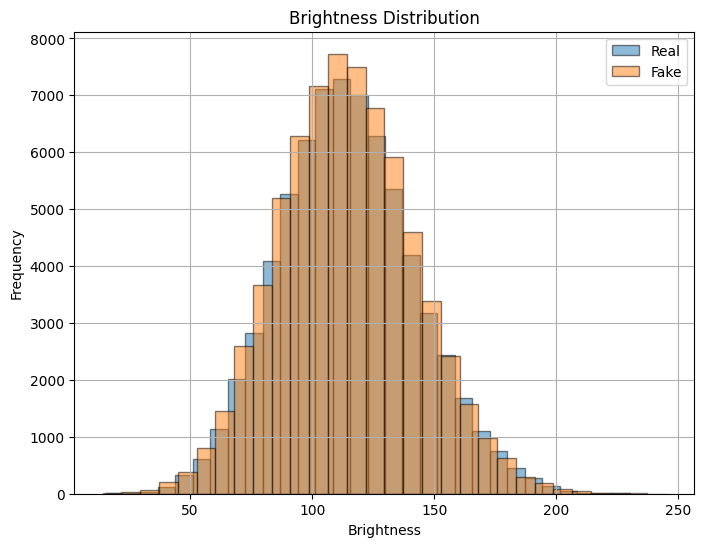

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat

def get_brightness(image_path):
    img = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

brightness_values = {'real': [], 'fake': []}

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            brightness = get_brightness(file_path)
            if file.startswith('real_'):
                brightness_values['real'].append(brightness)
            else:
                brightness_values['fake'].append(brightness)

plt.figure(figsize=(8, 6))
plt.hist(brightness_values['real'], alpha=0.5, label='Real', bins=30, edgecolor='black')
plt.hist(brightness_values['fake'], alpha=0.5, label='Fake', bins=30, edgecolor='black')
plt.legend()
plt.grid(True)
plt.title("Brightness Distribution")
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.show()


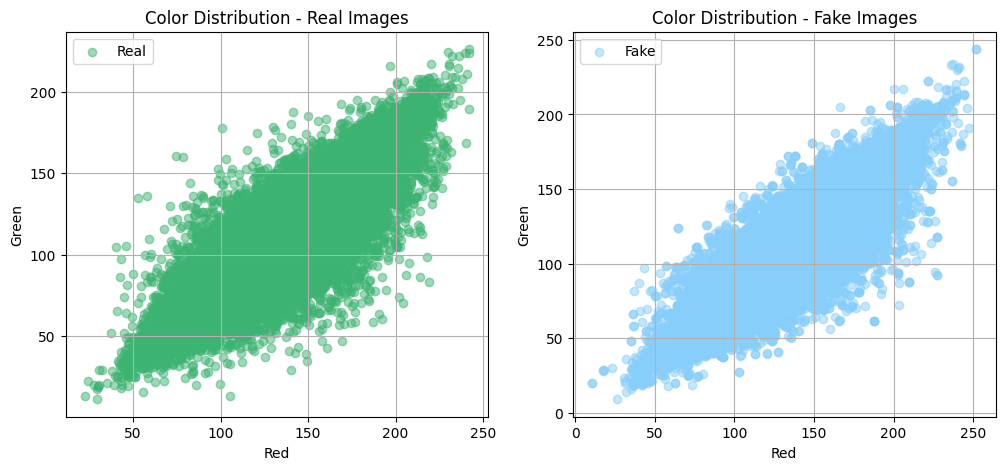

In [ ]:
def get_avg_color(image_path):
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

real_colors = []
fake_colors = []

for root, _, files in os.walk(directory):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith(('jpg', 'jpeg', 'png')):
            avg_color = get_avg_color(file_path)
            if file.startswith('real_'):
                real_colors.append(avg_color)
            else:
                fake_colors.append(avg_color)

real_colors = np.array(real_colors)
fake_colors = np.array(fake_colors)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(real_colors[:, 0], real_colors[:, 1], color='mediumseagreen', alpha=0.5, label='Real')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Real Images")

plt.subplot(1, 2, 2)
plt.scatter(fake_colors[:, 0], fake_colors[:, 1], color='lightskyblue', alpha=0.5, label='Fake')
plt.xlabel("Red")
plt.ylabel("Green")
plt.grid(True)
plt.legend()
plt.title("Color Distribution - Fake Images")

plt.show()


# 5. [Biggest](https://www.kaggle.com/datasets/maciejgronczynski/biggest-genderface-recognition-dataset)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maciejgronczynski/biggest-genderface-recognition-dataset")

directory = os.path.join(path, 'versions/1/faces')

print("Path to dataset files:", path)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()
male = 0
female = 0

for root, dirs, files in os.walk(path):
    for filename in files:
        if "woman" in filename:
            female += 1
        elif "man" in filename:
            male += 1

        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'# male: {male} || # female: {female} \n{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

100%|██████████| 439M/439M [00:06<00:00, 67.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/maciejgronczynski/biggest-genderface-recognition-dataset/versions/1
# male: 17678 || # female: 9489 
{'94x130': 1, '100x100': 11630, '250x250': 13230, '111x147': 1, '305x359': 1, '162x168': 1, '148x205': 2, '153x204': 1, '232x313': 1, '81x152': 1, '112x152': 1, '160x196': 1, '167x222': 1, '133x189': 1, '176x246': 1, '188x232': 1, '338x414': 1, '75x79': 1, '772x898': 1, '293x368': 1, '152x195': 2, '113x154': 2, '222x253': 1, '204x268': 1, '217x293': 1, '128x178': 2, '261x308': 1, '145x195': 1, '143x195': 1, '322x384': 1, '171x219': 1, '313x403': 1, '102x112': 1, '237x284': 1, '68x93': 1, '135x152': 1, '246x325': 1, '114x140': 1, '313x451': 1, '360x347': 1, '58x75': 2, '433x555': 1, '58x74': 1, '154x205': 1, '78x104': 1, '41x52': 2, '59x82': 2, '84x109': 2, '462x617': 1, '105x132': 1, '80x110': 3, '81x106': 1, '205x253': 1, '404x426': 1, '103x146': 1, '259x337': 1, '154x225': 1, '63x87': 1, '118x146': 1, '72x86': 1, '142x190': 1, '19

# 6. [Ashwin](https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset)

In [ ]:
import kagglehub
import os
from PIL import Image

# Download latest version
path = kagglehub.dataset_download("ashwingupta3012/male-and-female-faces-dataset")

directory = os.path.join(path, 'Male and Female face dataset')

print("Path to dataset files:", directory)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()
male = 0
female = 0

for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.startswith("0"):
            female += 1
        elif filename.startswith("1"):
            male += 1
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'# male: {male} || # female: {female} \n{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/ashwingupta3012/male-and-female-faces-dataset/versions/1/Male and Female face dataset
# male: 2720 || # female: 2698 
{'915x915': 4, '957x1300': 51, '236x354': 47, '640x828': 2, '1008x1008': 9, '500x741': 3, '1280x1920': 35, '4684x4000': 3, '640x960': 48, '640x640': 32, '480x720': 27, '736x920': 25, '650x867': 4, '1558x2500': 5, '460x690': 3, '800x1200': 37, '675x900': 14, '497x750': 11, '961x1200': 10, '400x600': 18, '2700x4057': 23, '1080x1350': 39, '533x800': 30, '318x480': 7, '736x1104': 162, '1414x2121': 2, '1412x1600': 1, '736x736': 18, '768x1024': 11, '1280x1707': 6, '450x600': 18, '233x350': 3, '600x899': 4, '736x1043': 2, '994x1408': 2, '1000x1500': 14, '536x800': 3, '723x1085': 3, '2987x2213': 3, '563x738': 2, '678x1017': 2, '1200x1206': 3, '2400x3600': 17, '276x365': 3, '564x846': 7, '1066x1332': 4, '255x370': 7, '500x693': 2, '400x400': 2, '736x1026': 12, '720x960': 14, '787x1568': 6, '979x1221': 2, '1438x2379': 5, '750

# 7. [Flickr](https://www.kaggle.com/datasets/arnaud58/flickrfaceshq-dataset-ffhq)
### No metadata, just more images

In [ ]:
import kagglehub
import os
from PIL import Image

# Download latest version
path = kagglehub.dataset_download("arnaud58/flickrfaceshq-dataset-ffhq")

print("Path to dataset files:", path)

dimension_dict = {}
file_size = {}
num_files = 0
extensions = set()

for root, dirs, files in os.walk(path):
    for filename in files:
        extensions.add(filename.split('.')[-1])

        file_size_num = os.path.getsize(os.path.join(root, filename))
        if file_size_num not in file_size:
            file_size[file_size_num] = 1
        else:
            file_size[file_size_num] += 1

        with Image.open(os.path.join(root, filename)) as img:
            width, height = img.size
            if f'{width}x{height}' not in dimension_dict:
                dimension_dict[f'{width}x{height}'] = 1
            else:
                dimension_dict[f'{width}x{height}'] += 1
        num_files += 1

print(f'{dimension_dict} \n{extensions} \n{file_size} \n{num_files}')
dimension_dict.clear()
file_size.clear()

Path to dataset files: /root/.cache/kagglehub/datasets/arnaud58/flickrfaceshq-dataset-ffhq/versions/1
{'512x512': 52001} 
{'png'} 
{380227: 1, 388195: 1, 382663: 1, 374222: 1, 405565: 3, 285178: 1, 381715: 1, 353451: 1, 414753: 1, 430135: 2, 405780: 1, 387417: 1, 387270: 1, 408292: 1, 410460: 2, 365526: 1, 363040: 1, 398434: 2, 522627: 1, 384308: 3, 411427: 5, 401399: 1, 407041: 3, 468695: 1, 442152: 1, 429655: 1, 433247: 5, 391038: 2, 364335: 1, 411049: 3, 447997: 2, 392139: 3, 381839: 1, 417308: 2, 392940: 2, 373231: 1, 447297: 2, 476501: 1, 348792: 1, 444151: 1, 361818: 1, 375819: 1, 396073: 1, 388307: 1, 396193: 2, 489648: 1, 417702: 1, 359067: 1, 356038: 1, 425621: 1, 417141: 1, 374737: 1, 379037: 4, 523241: 1, 332533: 2, 384626: 1, 399057: 1, 377299: 1, 459526: 1, 431018: 2, 371202: 1, 395264: 1, 394918: 1, 369512: 2, 387855: 1, 455401: 1, 408422: 1, 408303: 1, 409107: 1, 383247: 4, 401098: 1, 379166: 1, 414934: 2, 390823: 4, 356436: 1, 392510: 1, 411985: 1, 386668: 2, 373882: 1,

# 8. [UTKFace](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [ ]:
# General
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data
import plotly.express as px
import matplotlib.pyplot as plt

# Data Preprocessing
import tensorflow.data as tfds
from sklearn.model_selection import train_test_split

# Model
from keras.applications import VGG16
from keras.applications import Xception, InceptionV3
from keras.applications import ResNet50V2, ResNet152V2
from keras.applications import MobileNetV3Small, MobileNetV3Large

# Model training
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.layers import InputLayer

# Model Callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Setting constants for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
BATCH_SIZE = 32
IMAGE_SIZE = 224

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")
path = os.path.join(path, "UTKFace/")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace/


Total number of images  : 23708
Sample Image path       : 20_0_4_20170102233239947.jpg.chip.jpg
Sample Age              : 20
Sample Gender           : Male



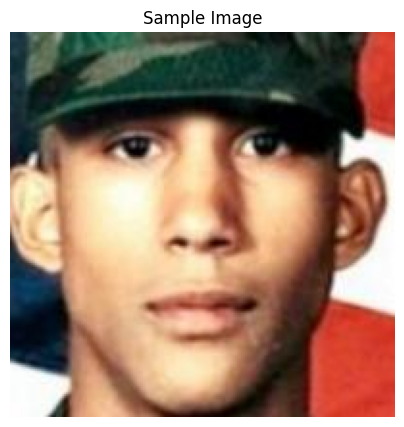

In [ ]:
# Initialize the directory path
dir_path = path
image_paths = os.listdir(dir_path)

# Initialize a Gender Mapping
gender_mapping = ["Male", "Female"]

# Choose and load an image randomly
rand_image_path = np.random.choice(image_paths)
rand_image = plt.imread(os.path.join(dir_path, rand_image_path))/255.
sample_age, sample_gender, *_ = rand_image_path.split("_")

print(f"Total number of images  : {len(image_paths)}")
print(f"Sample Image path       : {rand_image_path}")
print(f"Sample Age              : {sample_age}")
print(f"Sample Gender           : {gender_mapping[int(sample_gender)]}\n")

# Show the image
plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(rand_image)
plt.axis("off")
plt.show()

In [ ]:
# Initialize a male counter variable
male_count = 0

# Initialize variable to store all the ages.
ages = []

# Loop over the paths and check for male images.
for path in image_paths:
    path_split = path.split("_")
    if "0" == path_split[1]:
        male_count += 1
    ages.append(int(path_split[0]))

# Computee total female counts
female_count = len(image_paths) - male_count

# Visualizing The Class Imbalance
pie_chart = px.pie(
    names = gender_mapping,
    values = [male_count, female_count],
    hole = 0.4,
    title = "Gender Distribution (Donut Chart)",
    height = 500
)
pie_chart.show()

bar_graph = px.bar(
    y = gender_mapping,
    x = [male_count, female_count],
    title = "Gender Distribution (Bar Graph)",
    color = gender_mapping,
    height = 500
)
bar_graph.update_layout(
    yaxis_title = "Gender",
    xaxis_title = "Frequency Count"
)
bar_graph.show()

In [ ]:
# Histogram
fig = px.histogram(sorted(ages), title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Value Counts"
)
fig.show()

# Violin Plot
fig = px.violin(x = sorted(ages), title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Distribution"
)
fig.show()

# Box Plot
fig = px.box(x = sorted(ages), notched=True, title = "Age Distribution")
fig.update_layout(
    xaxis_title = "Age",
)
fig.show()


In [ ]:
# SHuffling the Images
np.random.shuffle(image_paths)

# Split data into training, testing and validation set
train_images, test_images = train_test_split(
    image_paths,
    train_size = 0.9,
    test_size = 0.1
)

train_images, valid_images = train_test_split(
    image_paths,
    train_size = 0.9,
    test_size = 0.1
)

print(f"Training Size : {len(train_images)}")
print(f"Testing Size  : {len(test_images)}")

# Extract age and gender
train_ages = [int(path.split("_")[0]) for path in train_images]
train_genders = [int(path.split("_")[1]) for path in train_images]

valid_ages = [int(path.split("_")[0]) for path in valid_images]
valid_genders = [int(path.split("_")[1]) for path in valid_images]

test_ages = [int(path.split("_")[0]) for path in test_images]
test_genders = [int(path.split("_")[1]) for path in test_images]

Training Size : 21337
Testing Size  : 2371


In [ ]:
def show_image(image, show=False):
    """
    Displays the provided image without axis.

    Args:
    - image (array-like): The image data to be displayed.
    - show (bool): If True, displays the image immediately. Defaults to False.

    Returns:
    - None
    """
    plt.imshow(image)
    plt.axis("off")

    if show:
        plt.show()


def preprocess_age_data(image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
    """
    Preprocesses an image for analysis by extracting age and gender from the image path,
    loading and decoding the image, resizing it to (IMAGE_SIZE,IMAGE_SIZE), normalizing pixel values,
    and returning the preprocessed image along with age and gender labels.

    Args:
    - image_path (str): The path to the image file.
    - dir_path (str): The directory path where the image is located. Defaults to `dir_path`.

    Returns:
    - tuple: A tuple containing the preprocessed image as a TensorFlow tensor,
             the age (int), and the gender (int) extracted from the image path.
    """
    # Load the Image
    image = tf.io.read_file(dir_path + image_path)
    image = tf.io.decode_jpeg(image)

    # Resize and Normalize the Image
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = image / 255.
    image = tf.cast(image, tf.float32)

    return image, age

def preprocess_gender_data(image_path, age, gender, dir_path=dir_path, IMAGE_SIZE = IMAGE_SIZE):
    """
    Preprocesses an image for analysis by extracting age and gender from the image path,
    loading and decoding the image, resizing it to (IMAGE_SIZE,IMAGE_SIZE), normalizing pixel values,
    and returning the preprocessed image along with age and gender labels.

    Args:
    - image_path (str): The path to the image file.
    - dir_path (str): The directory path where the image is located. Defaults to `dir_path`.

    Returns:
    - tuple: A tuple containing the preprocessed image as a TensorFlow tensor,
             the age (int), and the gender (int) extracted from the image path.
    """
    # Load the Image
    image = tf.io.read_file(dir_path + image_path)
    image = tf.io.decode_jpeg(image)

    # Resize and Normalize the Image
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    image = image / 255.
    image = tf.cast(image, tf.float32)

    return image, gender

In [ ]:
# Obtain training, testing and validation datasets
train_ds = tfds.Dataset.from_tensor_slices((train_images, train_ages, train_genders)).shuffle(2000)
train_age_ds = train_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
train_gender_ds = train_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

valid_ds = tfds.Dataset.from_tensor_slices((valid_images, valid_ages, valid_genders)).shuffle(2000)
valid_age_ds = valid_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
valid_gender_ds = valid_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

test_ds  = tfds.Dataset.from_tensor_slices((test_images, test_ages, test_genders)).shuffle(500)
test_age_ds = test_ds.map(preprocess_age_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)
test_gender_ds = test_ds.map(preprocess_gender_data, num_parallel_calls=BATCH_SIZE).batch(BATCH_SIZE).prefetch(tfds.AUTOTUNE)

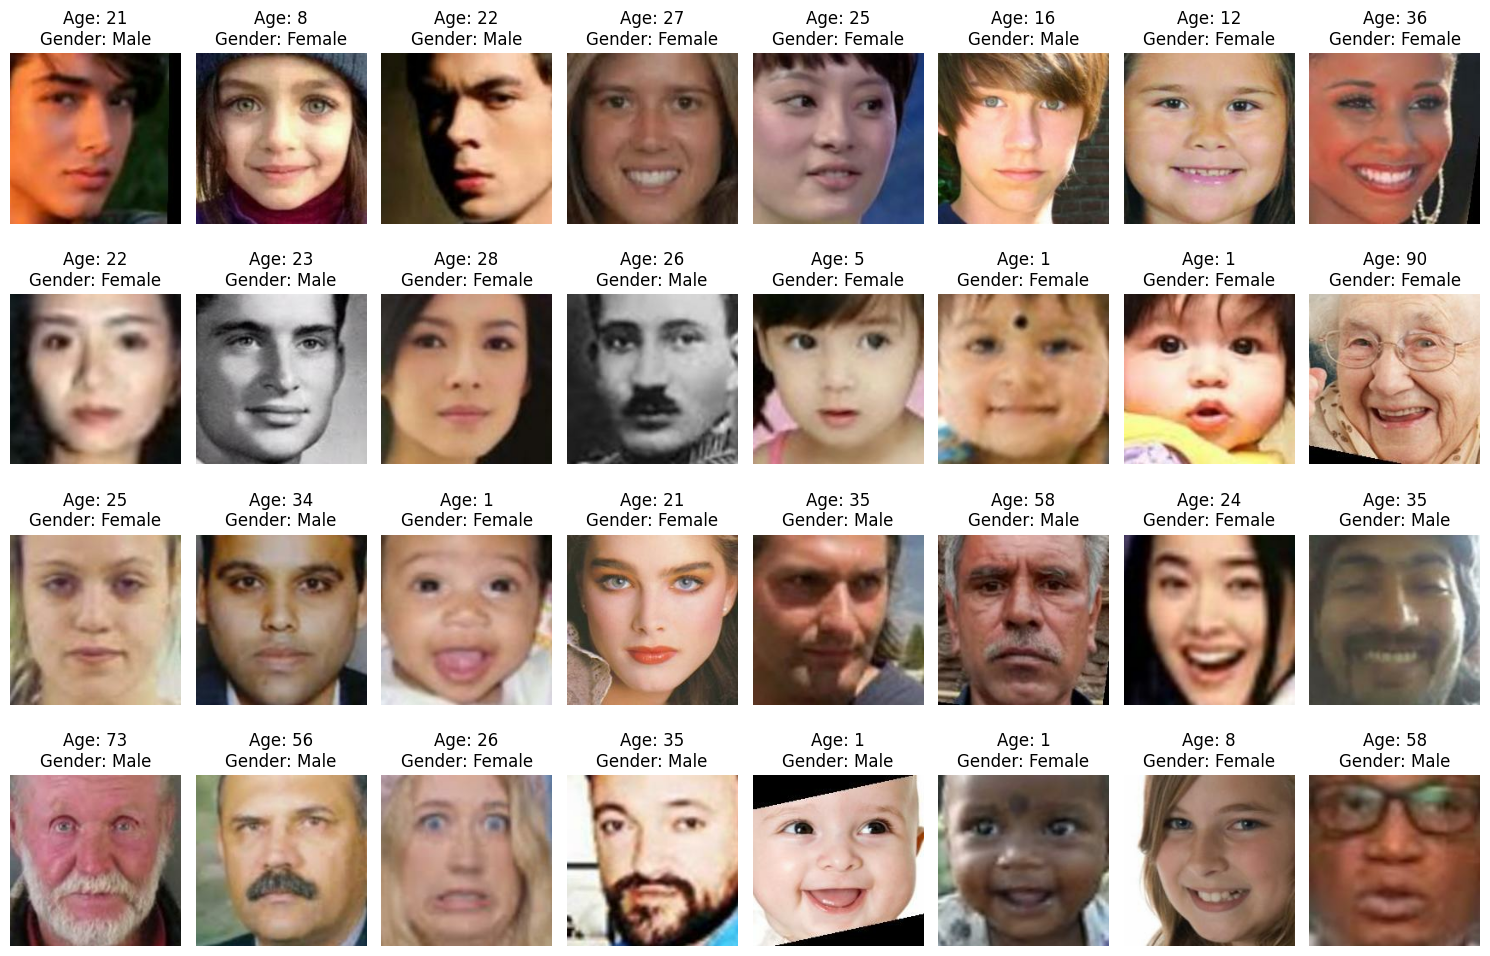

In [ ]:
plt.figure(figsize=(15, 10))
for images, ages, genders in train_ds.batch(BATCH_SIZE).take(1):

    for index in range(len(images)):
        image = tf.io.read_file(os.path.join(dir_path, images[index].numpy().decode()))
        image = tf.io.decode_jpeg(image)
        plt.subplot(4, 8, index + 1)
        plt.imshow(image)
        plt.title(f"Age: {ages[index]}\nGender: {gender_mapping[genders[index]]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Initializing all the Backbones
backbones = [
    (
        "VGG16",
        VGG16(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),
    (
        "ResNet50V2",
        ResNet50V2(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),

    (
        "ResNet152V2",
        ResNet152V2(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),

    (
        "Xception",
        Xception(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),

    (
        "InceptionV3",
        InceptionV3(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),

    (
        "MobileNetV3Small",
        MobileNetV3Small(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),

    (
        "MobileNetV3Large",
        MobileNetV3Large(
            input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
            weights = "imagenet",
            include_top = False
        )
    ),
]

In [ ]:
BACKBONE_HISTORIES = {}

for (name, backbone) in backbones:

    print(f"Testing : {name}")

    # Freeze the Model weights
    backbone.trainable = False

    # Creating a base model
    model = keras.Sequential([
        InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name = "InputLayer"),
        backbone,
        Dropout(0.2, name = "SlightDropout"),
        Flatten(name = "FlattenEmbeddings"),
        Dense(1, name = "Age")
    ])

    # Train the model for few iterations
    model.compile(
        loss = ["mae"],
        optimizer = "adam",
        weighted_metrics=[]
    )

    history = model.fit(
        train_age_ds,
        validation_data = valid_age_ds,
        epochs = 5,
        batch_size = BATCH_SIZE
    )

    BACKBONE_HISTORIES[name] = pd.DataFrame(history.history)
    cls()
    print("\n")



Testing : VGG16
Epoch 1/5
217/667 ━━━━━━━━━━━━━━━━━━━━ 2:28:33 20s/step - loss: 15.8604

NameError: name 'BACKBONE_HISTORIES' is not defined

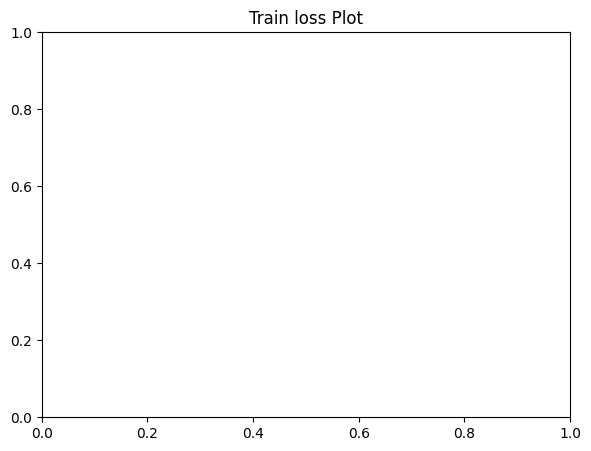

In [ ]:
metric = "loss"
plt.figure(figsize=(15, 5))
for i, sub in enumerate(['Train', 'Val']):

    plt.subplot(1, 2, i+1)
    plt.title(f"{sub} {metric} Plot")

    for name, history in BACKBONE_HISTORIES.items():
        plt.plot(history[metric] if sub=="Train" else history[f"val_{metric}"], label = name)
        plt.xlabel("Epochs")
        plt.ylabel(metric.title())
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
BACKBONE_HISTORIES = {}

for (name, backbone) in backbones:

    print(f"Testing : {name}")

    # Freeze the Model weights
    backbone.trainable = False

    # Creating a base model
    model = keras.Sequential([
        InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name = "InputLayer"),
        backbone,
        Dropout(0.2, name = "SlightDropout"),
        Flatten(name = "FlattenEmbeddings"),
        Dense(1, activation="sigmoid", name = "Age")
    ])

    # Train the model for few iterations
    model.compile(
        loss = ["binary_crossentropy"],
        optimizer = "adam",
        metrics = ['accuracy'],
        weighted_metrics=[]
    )

    history = model.fit(
        train_gender_ds,
        validation_data = valid_gender_ds,
        epochs = 5,
        batch_size = BATCH_SIZE
    )

    BACKBONE_HISTORIES[name] = pd.DataFrame(history.history)
    cls()
    print("\n")

In [ ]:
metric = "accuracy"
plt.figure(figsize=(15, 5))
for i, sub in enumerate(['Train', 'Val']):

    plt.subplot(1, 2, i+1)
    plt.title(f"{sub} {metric} Plot")

    for name, history in BACKBONE_HISTORIES.items():
        plt.plot(history[metric] if sub=="Train" else history[f"val_{metric}"], label = name)
        plt.xlabel("Epochs")
        plt.ylabel(metric.title())
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Loading backbone
vgg_16 = VGG16(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights = "imagenet")

# Freezing the backbone weights
vgg_16.trainable = False

# Creating a Age Network
age_net = Sequential([
    InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name="ImageInput"),
    vgg_16,
    Dropout(0.4, name = "SlightDroput"),
    Flatten(name="FlattenEmbeddings"),
    Dense(256, activation="relu", kernel_initializer="he_normal"),
    Dense(1, name="AgeOutput")
], name="AgeNet")

# Compiling Model
age_net.compile(
    loss = "mae",
    optimizer = 'adam',
    weighted_metrics=[]
)

In [ ]:
# Trining the Age Model
age_history = age_net.fit(
    train_age_ds,
    validation_data = valid_age_ds,
    epochs = 20,
    batch_size = BATCH_SIZE,
    callbacks = [
        EarlyStopping(
            patience = 5,
            monitor = "val_loss",
            restore_best_weights = True
        ),

        ModelCheckpoint(
            "Age-VGG16.keras",
            save_best_only=True
        )
    ]
)

In [ ]:
# Converting history into data frame.
age_his_df = pd.DataFrame(age_history.history)

# Visualization
age_his_df.plot()
plt.title("Age Network Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Mean Abs. Error")
plt.grid()
plt.show()

In [ ]:
# Initializing the backbone layer
resnet = ResNet152V2(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), include_top = False, weights="imagenet")

# Freeze the backbone weights
resnet.trainable = False

# Creating a gender model
gender_net = Sequential([
    InputLayer((IMAGE_SIZE, IMAGE_SIZE, 3), name="ImageInput"),
    resnet,
    Dropout(0.2, name = "SlightDroput"),
    GlobalAveragePooling2D(name="GlobalAvgPooling"),
    Dense(1, activation="sigmoid", name="gender")
], name="GenderNet")

gender_net.compile(
    loss = "binary_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy'],
    weighted_metrics=[]
)

In [ ]:
# Training the Gender Model
gender_history = gender_net.fit(
    train_gender_ds,
    validation_data = valid_gender_ds,
    epochs = 20,
    batch_size = BATCH_SIZE,
    callbacks = [
        EarlyStopping(
            patience = 5,
            monitor = "val_accuracy",
            restore_best_weights = True
        ),

        ModelCheckpoint(
            "Gender-ResNet152.keras",
            save_best_only=True
        )
    ]
)

In [ ]:
# Converting history into data frame.
gender_his_df = pd.DataFrame(gender_history.history)

# Visualization
plt.figure(figsize=(10, 5 ))
plt.subplot(1,2,1)
plt.suptitle("Gender Network Learning Curve")
plt.plot(gender_his_df['loss'], label="Loss")
plt.plot(gender_his_df['val_loss'], label="Val. Loss")
plt.xlabel("Epochs")
plt.ylabel("$Loss$")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(gender_his_df['accuracy'], label="Accuracy")
plt.plot(gender_his_df['val_accuracy'], label="Val. Accuracy")
plt.xlabel("Epochs")
plt.ylabel("$Accuracy$")
plt.grid()
plt.legend()

plt.show()


In [ ]:
# Loading saved models
age_net = tf.keras.models.load_model("/kaggle/input/age-and-gender-prediction-vgg16-resnet152v2/Weights/Age-VGG16.keras", compile=True)
gender_net = tf.keras.models.load_model("/kaggle/input/age-and-gender-prediction-vgg16-resnet152v2/Weights/Gender-ResNet152.keras", compile=True)

In [ ]:
# Evaluating test performance
age_net.evaluate(test_age_ds)
gender_net.evaluate(test_gender_ds)

In [ ]:
plt.figure(figsize=(15, 10))
for images, ages, genders in test_ds.batch(BATCH_SIZE).take(1):
    for index in range(len(images)):

        # Image Processing
        image = tf.io.read_file(dir_path + images[index])
        image = tf.io.decode_jpeg(image)
        image = tf.cast(image, tf.float32)
        image = image/255.
        image = tf.image.resize(image, [224,224])
        image = tf.reshape(image, [-1,224,224,3])

        # Predictions
        pred_age = tf.round(tf.squeeze(age_net.predict(image, verbose=0)), 2)
        pred_gender = tf.round(tf.squeeze(gender_net.predict(image, verbose=0)))

        # Visualization
        plt.subplot(4, 8, index + 1)
        plt.imshow(image[0])
        plt.title(f"Age: {int(pred_age)}\nGender: {gender_mapping[int(pred_gender)]}")
        plt.axis("off")

plt.tight_layout()
plt.show()

# 9. [OpenCV Pre-Trained Model](https://www.geeksforgeeks.org/age-and-gender-detection-using-opencv-in-python/)

In [4]:
import kagglehub
import os
import pandas as pd
from PIL import Image

directory = kagglehub.dataset_download("jessicali9530/celeba-dataset")
path = os.path.join(directory, "img_align_celeba/img_align_celeba")

print("Path to dataset files:", directory)

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


In [16]:
import cv2
import matplotlib.pyplot as plt

# Input image
for img in os.listdir(path)[:5]:
    image = cv2.imread(os.path.join(path, img))
    image = cv2.resize(image, (720, 640))

    # Importing Models and set mean values
    face1 = "opencv_face_detector.pbtxt"
    face2 = "opencv_face_detector_uint8.pb"
    age1 = "age_deploy.prototxt"
    age2 = "age_net.caffemodel"
    gen1 = "gender_deploy.prototxt"
    gen2 = "gender_net.caffemodel"

    MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

    # Using models
    # Face
    face = cv2.dnn.readNet(face2, face1)

    # age
    age = cv2.dnn.readNet(age2, age1)

    # gender
    gen = cv2.dnn.readNet(gen2, gen1)

    # Categories of distribution
    la = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
        '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    lg = ['Male', 'Female']

    # Copy image
    fr_cv = image.copy()

    # Face detection
    fr_h = fr_cv.shape[0]
    fr_w = fr_cv.shape[1]
    blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                                [104, 117, 123], True, False)

    face.setInput(blob)
    detections = face.forward()

    # Face bounding box creation
    faceBoxes = []
    for i in range(detections.shape[2]):

        #Bounding box creation if confidence > 0.7
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:

            x1 = int(detections[0, 0, i, 3]*fr_w)
            y1 = int(detections[0, 0, i, 4]*fr_h)
            x2 = int(detections[0, 0, i, 5]*fr_w)
            y2 = int(detections[0, 0, i, 6]*fr_h)

            faceBoxes.append([x1, y1, x2, y2])

            cv2.rectangle(fr_cv, (x1, y1), (x2, y2),
                        (0, 255, 0), int(round(fr_h/150)), 8)

    # Checking if face detected or not
    if not faceBoxes:
        print("No face detected")

    # Final results (otherwise)
    # Loop for all the faces detected
    for faceBox in faceBoxes:
        ›age = cv2.dnn.readNet(age2, age1)

        #Extracting face as per the faceBox
        face = fr_cv[max(0, faceBox[1]-15):
                    min(faceBox[3]+15, fr_cv.shape[0]-1),
                    max(0, faceBox[0]-15):min(faceBox[2]+15,
                                fr_cv.shape[1]-1)]

        #Extracting the main blob part
        blob = cv2.dnn.blobFromImage(
            face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        #Prediction of gender
        gen.setInput(blob)
        genderPreds = gen.forward()
        gender = lg[genderPreds[0].argmax()]

        #Prediction of age
        age.setInput(blob)
        agePreds = age.forward()
        age = la[agePreds[0].argmax()]

        #Putting text of age and gender
        #At the top of box
        cv2.putText(fr_cv,
                    f'{gender}, {age}',
                    (faceBox[0]-150, faceBox[1]+10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.3,
                    (217, 0, 0),
                    4,
                    cv2.LINE_AA)

        plt.figure(figsize=(7, 7))
        plt.imshow(fr_cv)




Output hidden; open in https://colab.research.google.com to view.

# 10. [DeepFace Pre-Trained Model](https://github.com/JawadIshtiaq/Age-Gender-Detection) for Age and Gender and Ethnicity

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=6267b4ff8e629b41705ab87a4ddfdcbc383335cc489b6421ba46a05f5cc584d0
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [6]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

import kagglehub
import os
import pandas as pd
from PIL import Image

all_results = []

directory = kagglehub.dataset_download("jessicali9530/celeba-dataset")
path = os.path.join(directory, "img_align_celeba/img_align_celeba")

print("Path to dataset files:", directory)

balanced = pd.read_csv("balanced_male_female_df.csv")
balanced['image_path'] = balanced['image_id'].apply(lambda x: os.path.join(path, f"{x}"))
balanced.to_csv('balanced_full_path.csv')
for img in balanced.image_path[:10]:
    image = cv2.imread(img)

    result = DeepFace.analyze(image, actions=['age','race'], enforce_detection=False)
    if isinstance(result, list) and len(result) > 0:
        result_dict = result[0]
        result_dict['image_path'] = img
        all_results.append(result_dict)

df = pd.DataFrame(all_results)
df.drop('region', axis=1)

merged_df = pd.merge(balanced, df, on='image_path', how='inner')
merged_df.drop(columns={'region', 'image_id'}, axis=1)

merged_df.to_csv("balanced_info.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


# 11. [UTK](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [9]:
import kagglehub
import os
import matplotlib.pyplot as plt

# Download latest version
dir = kagglehub.dataset_download("jangedoo/utkface-new")
path = os.path.join(dir, 'UTKFace')
print("Path to dataset files:", path)

import os
from collections import defaultdict

age_dict = defaultdict(int)
gender_dict = defaultdict(int)
ethnicity_dict = defaultdict(int)
huh = defaultdict(int)

age_list = []
gender_list = []
ethnicity_list = []

for img in os.listdir(path):
    parts = img.split("_")

    huh[len(parts)] += 1

    if len(parts) == 4:
        age, gender, ethnicity, *_ = parts

        age = int(age)
        gender = int(gender)
        ethnicity = int(ethnicity)

        age_list.append(age)
        gender_list.append(gender)
        ethnicity_list.append(ethnicity)

        age_dict[age] += 1
        gender_dict[gender] += 1
        ethnicity_dict[ethnicity] += 1

print(f"{dict(age_dict)}\n{dict(gender_dict)}\n{dict(ethnicity_dict)}")

Path to dataset files: /root/.cache/kagglehub/datasets/jangedoo/utkface-new/versions/1/UTKFace
{25: 734, 50: 381, 75: 148, 35: 880, 1: 1123, 47: 170, 40: 526, 29: 570, 15: 177, 16: 247, 52: 232, 28: 918, 8: 263, 56: 236, 38: 325, 60: 293, 32: 664, 19: 98, 2: 482, 62: 125, 24: 859, 27: 615, 18: 262, 63: 103, 30: 724, 53: 241, 34: 409, 20: 284, 26: 2197, 17: 158, 58: 271, 45: 440, 11: 65, 7: 139, 12: 130, 6: 131, 72: 98, 65: 259, 37: 293, 43: 157, 68: 100, 36: 483, 54: 353, 39: 265, 42: 266, 9: 166, 41: 132, 90: 82, 46: 153, 48: 153, 31: 350, 21: 346, 89: 33, 44: 100, 86: 35, 4: 273, 23: 426, 22: 395, 55: 268, 10: 156, 5: 196, 61: 159, 14: 157, 99: 9, 78: 69, 51: 138, 85: 155, 49: 148, 66: 77, 77: 28, 59: 82, 3: 289, 33: 143, 71: 33, 57: 97, 69: 56, 95: 9, 70: 147, 82: 40, 74: 32, 88: 34, 81: 22, 73: 63, 80: 133, 13: 81, 64: 50, 76: 58, 67: 94, 79: 23, 92: 13, 84: 24, 83: 18, 96: 17, 101: 2, 87: 10, 105: 5, 100: 11, 110: 5, 116: 4, 93: 5, 111: 1, 115: 3, 91: 2, 103: 1}
{1: 11314, 0: 1239

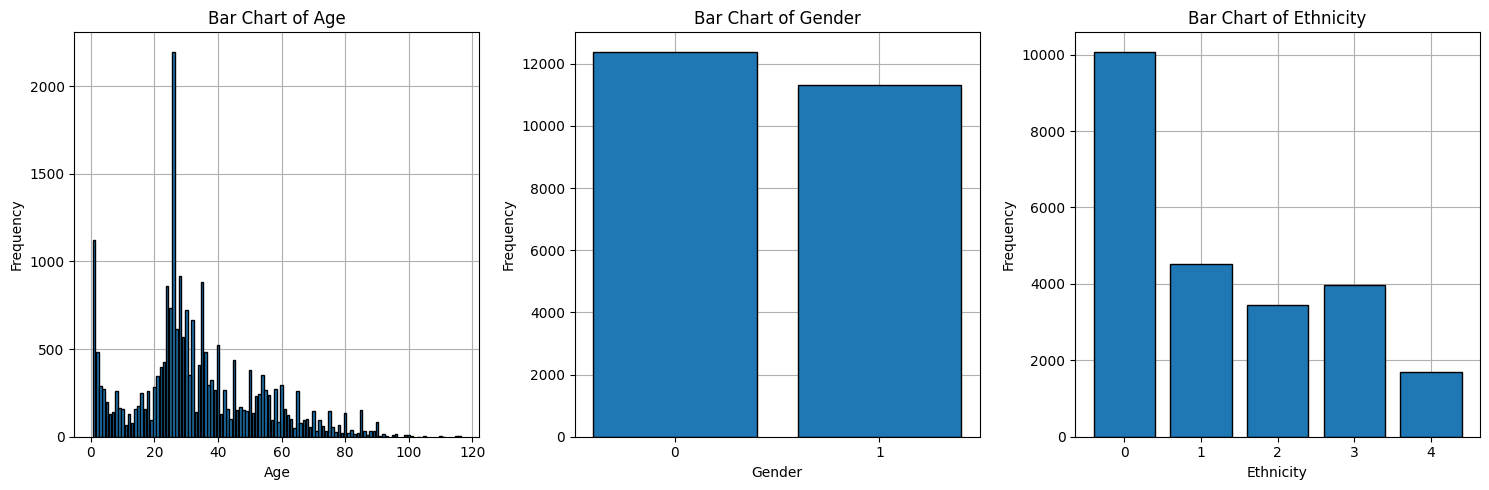

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1-row, 3-column subplot layout

# Age Distribution
axes[0].bar(age_dict.keys(), age_dict.values(), edgecolor='black', zorder=2)
axes[0].grid(True)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Bar Chart of Age")

# Gender Distribution
axes[1].bar(gender_dict.keys(), gender_dict.values(), edgecolor='black', zorder=2)
axes[1].grid(True)
axes[1].set_xticks([min(gender_dict.keys()), max(gender_dict.keys())])  # Ensure only min & max labels
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Bar Chart of Gender")

# Ethnicity Distribution
axes[2].bar(ethnicity_dict.keys(), ethnicity_dict.values(), edgecolor='black', zorder=2)
axes[2].grid(True)
axes[2].set_xlabel("Ethnicity")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Bar Chart of Ethnicity")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# 12. [FairFace](https://github.com/joojs/fairface) for Race, Gender, and Age

In [37]:
!git clone https://github.com/dchen236/FairFace.git

Cloning into 'FairFace'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 220 (delta 54), reused 49 (delta 49), pack-reused 163 (from 3)
Receiving objects: 100% (220/220), 14.23 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [48]:
%cd FairFace

/content/FairFace


In [49]:
!python3 predict.py --csv test_imgs.csv

using CUDA?: True
Traceback (most recent call last):
  File "/content/FairFace/predict.py", line 215, in <module>
    detect_face(imgs, SAVE_DETECTED_AT)
  File "/content/FairFace/predict.py", line 27, in detect_face
    cnn_face_detector = dlib.cnn_face_detection_model_v1('dlib_models/mmod_human_face_detector.dat')
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v7/pypi/dlib/19.24.2/fcM2u8JzXsJiJTt1ohoh6/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version


In [35]:
# import pandas as pd
# import kagglehub
# import os
# import pandas as pd
# from PIL import Image
# import torch
# from torchvision import transforms
# from fairface import FairFaceClassifier

# model = FairFaceClassifier(pretrained=True)
# model.eval()



directory = kagglehub.dataset_download("jessicali9530/celeba-dataset")
path = os.path.join(directory, "img_align_celeba/img_align_celeba")

print("Path to dataset files:", directory)

balanced = pd.read_csv("balanced_male_female_df.csv")

balanced['image_path'] = balanced['image_id'].apply(lambda x: os.path.join(path, f"{x}.jpg"))

balanced_path = balanced.image_path
balanced_path.to_csv("balanced_path.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2


In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from fairface import FairFaceClassifier

model = FairFaceClassifier(pretrained=True)
model.eval()

img = Image.open("face.jpg")
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img = transform(img).unsqueeze(0)

with torch.no_grad():
    race, confidence = model(img)

print(race)  # Predicted ethnicity


#13. Double Check

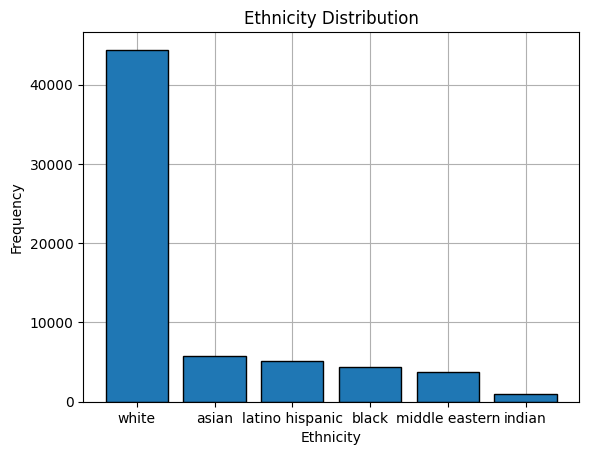

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("balanced_celeba_age_ethnicity.csv")

eth_count = df.dominant_race.value_counts().to_dict()
plt.bar(eth_count.keys(), eth_count.values(), edgecolor='black', zorder=2)
plt.grid(True)
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.title("Ethnicity Distribution")
plt.show()


In [23]:
len(df)

64274

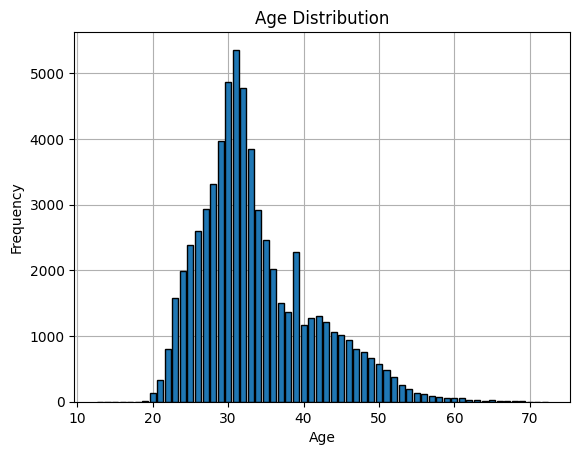

In [21]:
age_count = df.age.value_counts().to_dict()
plt.bar(age_count.keys(), age_count.values(), edgecolor='black', zorder=2)
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


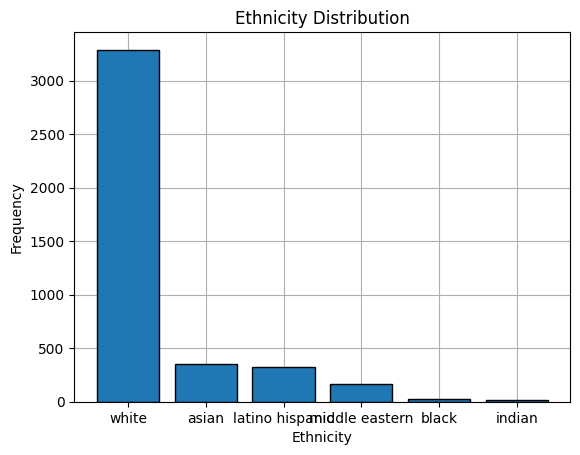

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("generated_img_age_gender_ethnicity.csv")

eth_count = df.dominant_race.value_counts().to_dict()
plt.bar(eth_count.keys(), eth_count.values(), edgecolor='black', zorder=2)
plt.grid(True)
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.title("Ethnicity Distribution - Fake Images")
plt.show()


In [26]:
len(df)

4158

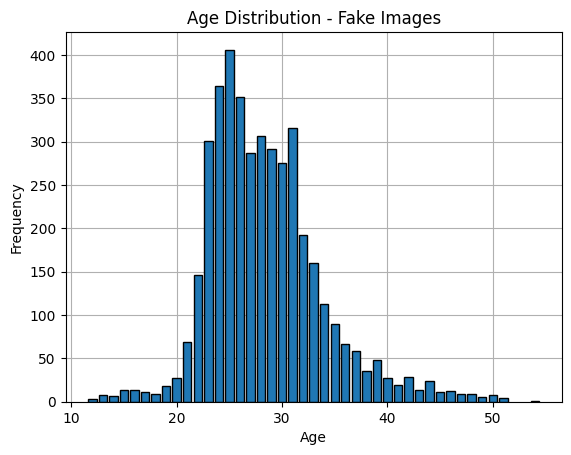

In [25]:
age_count = df.age.value_counts().to_dict()
plt.bar(age_count.keys(), age_count.values(), edgecolor='black', zorder=2)
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution - Fake Images")
plt.show()


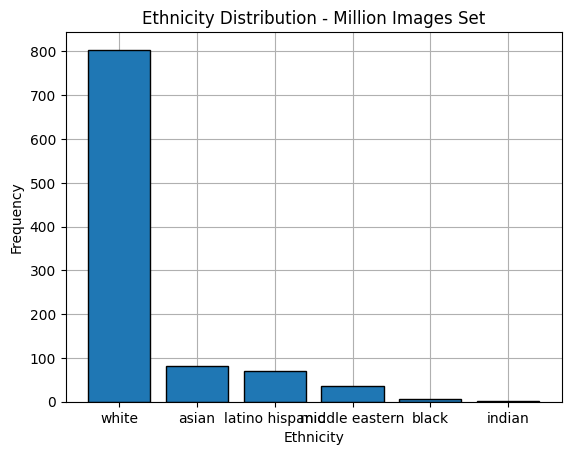

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("million_img_age_gender_ethnicity.csv")

eth_count = df.dominant_race.value_counts().to_dict()
plt.bar(eth_count.keys(), eth_count.values(), edgecolor='black', zorder=2)
plt.grid(True)
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.title("Ethnicity Distribution - Million Images Set")
plt.show()


#14. [1 Million AI](https://www.kaggle.com/datasets/dullaz/1m-ai-generated-faces-128x128)

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dullaz/1m-ai-generated-faces-128x128")

print("Path to dataset files:", path)

100%|██████████| 4.08G/4.08G [01:05<00:00, 66.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dullaz/1m-ai-generated-faces-128x128/versions/5
